In [7]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, MaxPool2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models, losses
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_set = pd.read_csv('/content/drive/MyDrive/Mtech Project/Dataset/Augmented Messidor*5/aug_train_label.csv')    # reading the csv file
train_set.head() 

,Image,Id,Risk of Macular Edema
0,20051019_38557_0100_PP.tif_0_1898.tif,2,0
1,20051019_38557_0100_PP.tif_0_3322.tif,2,0
2,20051019_38557_0100_PP.tif_0_4844.tif,2,0
3,20051019_38557_0100_PP.tif_0_5319.tif,2,0
4,20051019_38557_0100_PP.tif_0_687.tif,2,0


In [8]:
train_image = []

for i in tqdm(range(train_set.shape[0])):
    img = image.load_img('../content/drive/MyDrive/Mtech Project/Dataset/Augmented Messidor*5/aug_train/' + train_set['Image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)

100%|██████████| 5760/5760 [00:18<00:00, 318.52it/s]


(5760, 224, 224, 3)


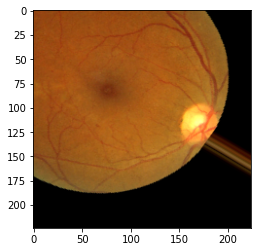

In [9]:
print(X.shape)
plt.imshow(X[2])

In [11]:
test_set =  pd.read_csv('/content/drive/MyDrive/Mtech Project/Dataset/Augmented Messidor*5/test.csv')    # reading the csv file
test_set.head()

,Image,Id,Risk of macular edema
0,20060410_44464_0200_PP.tif,0,0
1,20051213_61892_0100_PP.tif,0,0
2,20051020_53062_0100_PP.tif,3,2
3,20051116_58835_0400_PP.tif,3,1
4,20051214_51811_0100_PP.tif,3,1


In [12]:
test_image = []

for i in tqdm(range(test_set.shape[0])):
    img = image.load_img('../content/drive/MyDrive/Mtech Project/Dataset/Augmented Messidor*5/test/' + test_set['Image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)

Y = np.array(test_image)

100%|██████████| 240/240 [01:38<00:00,  2.44it/s]


In [13]:
y = np.array(train_set.drop(['Image', 'Id'],axis=1))
y.shape

(5760, 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5184, 224, 224, 3)
(576, 224, 224, 3)
(5184, 1)
(576, 1)


In [15]:
model= tf.keras.applications.MobileNet(
          input_shape=None,
          alpha=1.0,
          depth_multiplier=1,
          dropout=0.001,
          include_top=True,
          weights="imagenet",
          input_tensor=None,
          pooling=None,
          classes=1000,
          classifier_activation="softmax",
      )

17235968/17225924 [==============================] - 0s 0us/step


In [16]:
mobile_model = Sequential()

for layer in model.layers[:-1]:
    mobile_model.add(layer)
mobile_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pw_1 (Conv2D)           (None, 112, 112, 64)      2

In [17]:
for layer in mobile_model.layers:
    layer.trainable = False

mobile_model.add(Dense(4,activation = 'softmax'))

mobile_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pw_1 (Conv2D)           (None, 112, 112, 64)      2

In [18]:
mobile_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
print("Hyperparameters : {} \n".format(mobile_model.optimizer.get_config()))

Hyperparameters : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False} 



In [19]:
history = mobile_model.fit(X_train, y_train,
          batch_size=4,
          epochs=30,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/30
1296/1296 [==============================] - 227s 173ms/step - loss: 0.9977 - accuracy: 0.7450 - val_loss: 0.7109 - val_accuracy: 0.8073
Epoch 2/30
1296/1296 [==============================] - 230s 178ms/step - loss: 0.8510 - accuracy: 0.7596 - val_loss: 0.7321 - val_accuracy: 0.7899
Epoch 3/30
1296/1296 [==============================] - 237s 183ms/step - loss: 0.8530 - accuracy: 0.7554 - val_loss: 0.6878 - val_accuracy: 0.7465
Epoch 4/30
1296/1296 [==============================] - 241s 186ms/step - loss: 0.8239 - accuracy: 0.7637 - val_loss: 0.7023 - val_accuracy: 0.8142
Epoch 5/30
1296/1296 [==============================] - 234s 181ms/step - loss: 0.8303 - accuracy: 0.7612 - val_loss: 0.9149 - val_accuracy: 0.6458
Epoch 6/30
1296/1296 [==============================] - 231s 178ms/step - loss: 0.8360 - accuracy: 0.7575 - val_loss: 0.6707 - val_accuracy: 0.8108
Epoch 7/30
1296/1296 [==============================] - 232s 179ms/step - loss: 0.8221 - accuracy: 0.7639 - val_

In [20]:
score = mobile_model.evaluate(X_test, y_test, verbose=0)
print("Hyperparameters : {} \n".format(mobile_model.optimizer.get_config()))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Hyperparameters : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False} 

Test loss: 0.8303792476654053
Test accuracy: 0.7586805820465088


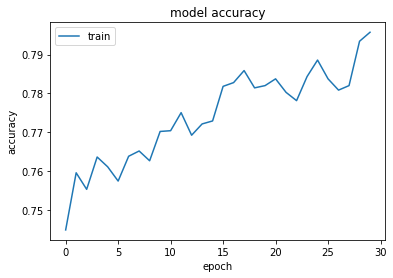

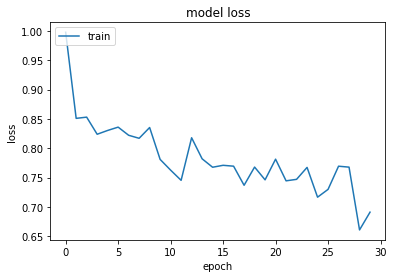

In [21]:
#Plotting the graph of accuracy VS epoch
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

#Plotting the graph of loss VS epoch
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()